In [3]:
%matplotlib inline

# Practice problems

### For Problem 1

### The Rayleigh distribution has PDF f(x)=xe−x2/2,x>0. Let X have the Rayleigh distribution.

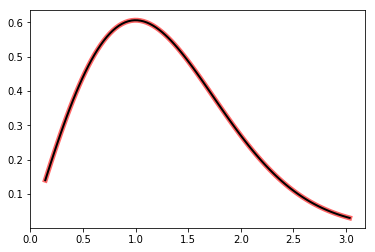

In [5]:
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = rayleigh.stats(moments='mvsk')
x = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 100)
ax.plot(x, rayleigh.pdf(x),
       'r-', lw=5, alpha=0.6, label='rayleigh pdf')
rv = rayleigh()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

### a) Find P(1 < X < 3)

In [7]:
import math

In [8]:
# By definition, we find P(1 < X < 3) = integral f(x)dx = integral xe^(-x^2/2) = -e^(-x^2/2) | from 1 to 3 which is equal to:
-math.exp(-9/2) + math.exp(-1/2)

0.5954216631743912

In [10]:
# By using library
rayleigh.cdf(3) - rayleigh.cdf(1)

0.5954216631743912

### b)  Find the first quartile, median, and third quartile of X; these are defined to be the values q1,q2,q3 (respectively) such that P(X≤qj)=j/4 for j=1,2,3.

In [19]:
math.sqrt(-2*math.log(3/4))

0.7585276164409321

In [20]:
math.sqrt(-2*math.log(1/2))

1.1774100225154747

In [21]:
math.sqrt(-2*math.log(1/4))

1.6651092223153954

### Problem 2

### Let Z∼N(0,1) and X=Z2. Then the distribution of X is called Chi-Square with 1 degree of freedom. This distribution appears in many statistical methods. Find a good numerical approximation to P(1≤X≤4) using facts about the Normal distribution, without querying a calculator/computer/table about values of the Normal CDF.

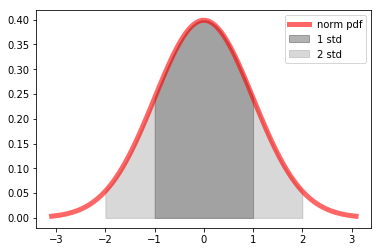

In [47]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.001),
                norm.ppf(0.999), 100)
x_fill_2 = np.linspace(-2, 2, 100)
x_fill_1 = np.linspace(-1, 1, 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

ax.fill_between(x_fill_1, norm.pdf(x_fill_1), color='k', alpha=0.3, label='1 std')

ax.fill_between(x_fill_2, norm.pdf(x_fill_2), color='grey', alpha=0.3, label='2 std')

ax.legend()

In [28]:
P(1 < X < 4) = P(1 < Z2 < 4) = P(1 < Z < 4 and -4 < Z < -1) = P(-4 < Z < -4) - P(-1< Z < 1) = 0.95-0.68

0.2699999999999999

### For Problem 3

### The Pareto distribution with parameter a>0 has PDF f(x)=a/xa+1 for x≥1 (and 0 otherwise). This distribution is often used in statistical modeling.

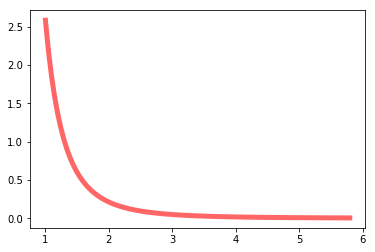

In [32]:
from scipy.stats import pareto
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

### (a) Find the CDF of a Pareto r.v. with parameter a.

In [48]:
# F(x)=1−1xa for x>1, and F(x)=0 for x≤1.

### (b) Suppose that for a simulation you want to run, you need to generate i.i.d. Pareto(a) r.v.s. Suppose you have a computer that knows how to generate Unif(0,1) r.v., but does not know how to generate Pareto r.v. Let U∼Unif(0,1). Give a function of U that has the Pareto(a) distribution. (Then, to run your simulation, you can generate a lot of i.i.d. Uniform r.v.s, and then convert them into Pareto r.v.s.)

In [49]:
# 1 / (1−U)1/a

### Problem 4

### A post office has 2 clerks. Alice enters the post office while 2 other customers, Bob and Claire, are being served by the 2 clerks. She is next in line. Assume that the time a clerk spends serving a customer has the Expo(λ) distribution. What is the probability that Alice is the last of the 3 customers to be done being served?

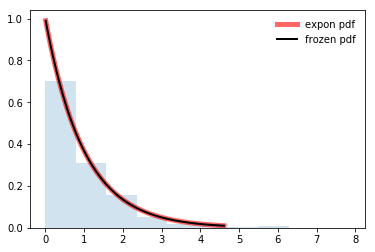

In [54]:
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Calculate a few first moments:
mean, var, skew, kurt = expon.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
# This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

# Generate random numbers:
r = expon.rvs(size=1000)

# And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()